# Gesture UI Project 1
By Levente Kalman

Student no: G00392201

In [2]:
# Imports
import os
import glob 
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Set random seed 
RANDOM_SEED = 392201

In [4]:
# Define dataset path
DATASET_PATH = sorted(glob.glob('fashion/*/*.png'))

# Define the actual categories present in the dataset
categories = ['ankleboot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 'trouser', 'tshirt-top']

# Create a mapping from class names to integer labels
class_mapping = {category: idx for idx, category in enumerate(categories)}

# Create a file list
X = np.array([np.array(Image.open(f).convert('L').resize((20, 20))).flatten() for f in DATASET_PATH]) / 255.0 # normalize pixels
# Extract class labels from filenames
y = np.array([class_mapping[os.path.basename(os.path.dirname(f))] for f in DATASET_PATH])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 10 labels:", y[:10])  # Check labels

a = [s.split() for s in " ".join(DATASET_PATH).split("\\") if s]

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

# Print shapes of datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_valid.shape, y_valid.shape)
print("Test set size:", X_test.shape, y_test.shape)

Shape of X: (70000, 400)
Shape of y: (70000,)
First 10 labels: [0 0 0 0 0 0 0 0 0 0]
Training set size: (42000, 400) (42000,)
Validation set size: (14000, 400) (14000,)
Test set size: (14000, 400) (14000,)


# Classifier Methods
Classification algorithms used:
- SVM
- Logistical Regression
- K Nearest Neighbor
- Random Forest

## SVM 

In [5]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=RANDOM_SEED)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred = svm_classifier.predict(X_valid)
accuracy = svm_classifier.score(X_test, y_test)

In [6]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred, target_names=categories))
print(confusion_matrix(y_valid, y_pred))
print("SVM Test Accuracy:", accuracy)

              precision    recall  f1-score   support

   ankleboot       0.96      0.96      0.96      1363
         bag       0.96      0.97      0.97      1414
        coat       0.80      0.84      0.82      1395
       dress       0.87      0.91      0.89      1441
    pullover       0.82      0.80      0.81      1424
      sandal       0.97      0.95      0.96      1406
       shirt       0.74      0.66      0.70      1403
     sneaker       0.93      0.95      0.94      1406
     trouser       0.99      0.96      0.98      1387
  tshirt-top       0.82      0.87      0.85      1361

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000

[[1303    1    0    0    0   12    1   46    0    0]
 [   0 1378    6    6    4    2    9    5    0    4]
 [   0    4 1171   39   90    0   88    0    2    1]
 [   0    6   40 1316    8    0   30    0    4   37]
 [   0    8  150   15 1136   

### SVM - Cross Validation
### The following cell takes approx 75 minutes to run, do not run unless absolutely necessary

In [7]:
# Define the parameter grid for SVM
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(SVC(kernel='linear', probability=False, random_state=RANDOM_SEED), param_grid_svm, cv=5, scoring='accuracy')

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Re-train the SVM classifier with the best parameters
svm_best = SVC(**best_params_svm, random_state=RANDOM_SEED)
svm_best.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_svm_best = svm_best.predict(X_valid)
accuracy_svm_best = svm_best.score(X_test, y_test)

print(f'The best parameters for SVM are {best_params_svm} with a cross-validated accuracy of {best_score_svm:.4f}')


The best parameters for SVM are {'C': 0.1} with a cross-validated accuracy of 0.8593


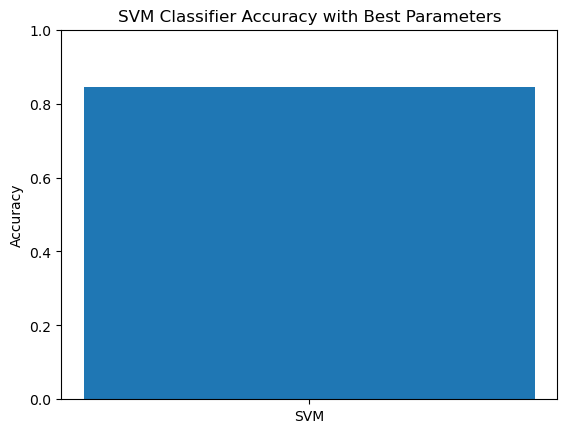

In [8]:
# Plot the accuracy of the SVM classifier with the best parameters
plt.bar(['SVM'], [accuracy_svm_best])
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy with Best Parameters')
plt.ylim(0, 1)
plt.show()

In [9]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_svm_best, target_names=categories))
print(confusion_matrix(y_valid, y_pred_svm_best))
print("SVM Test Accuracy with best parameters:", accuracy_svm_best)

              precision    recall  f1-score   support

   ankleboot       0.91      0.93      0.92      1363
         bag       0.94      0.96      0.95      1414
        coat       0.72      0.80      0.76      1395
       dress       0.82      0.90      0.86      1441
    pullover       0.78      0.71      0.75      1424
      sandal       0.93      0.91      0.92      1406
       shirt       0.65      0.51      0.57      1403
     sneaker       0.89      0.89      0.89      1406
     trouser       0.99      0.94      0.97      1387
  tshirt-top       0.75      0.85      0.80      1361

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000

[[1271    1    0    0    0   25    0   65    0    1]
 [   1 1353    5    9    7    9   17    7    0    6]
 [   0    8 1118   62   78    0  124    0    1    4]
 [   0    5   40 1296    6    0   39    0    6   49]
 [   0   10  237   14 1011   

## Logistical Regression

In [10]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000)

# Train the classifier
logistic_regression_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_lr = logistic_regression_classifier.predict(X_valid)
accuracy_lr = logistic_regression_classifier.score(X_test, y_test)

In [11]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_lr, target_names=categories))
print(confusion_matrix(y_valid, y_pred_lr))
print("Logistic Regression Test Accuracy:", accuracy_lr)

              precision    recall  f1-score   support

   ankleboot       0.94      0.95      0.95      1363
         bag       0.95      0.95      0.95      1414
        coat       0.74      0.79      0.76      1395
       dress       0.85      0.88      0.86      1441
    pullover       0.76      0.74      0.75      1424
      sandal       0.94      0.93      0.94      1406
       shirt       0.66      0.59      0.62      1403
     sneaker       0.92      0.93      0.93      1406
     trouser       0.98      0.96      0.97      1387
  tshirt-top       0.80      0.84      0.82      1361

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

[[1289    2    0    0    0   23    0   48    0    1]
 [   1 1344    6    8    9    8   21    7    0   10]
 [   0    7 1104   40  120    0  123    0    1    0]
 [   0    9   56 1264   14    0   30    0   18   50]
 [   0    9  184   16 1048   

### Logistical Regression - Cross Validation

In [12]:
# Define the parameter grid for regularization strength
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=RANDOM_SEED, max_iter=75000)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameter and the best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f'The best regularization size (C) is {best_C} with a cross-validated accuracy of {best_score:.4f}')

The best regularization size (C) is 1 with a cross-validated accuracy of 0.8530


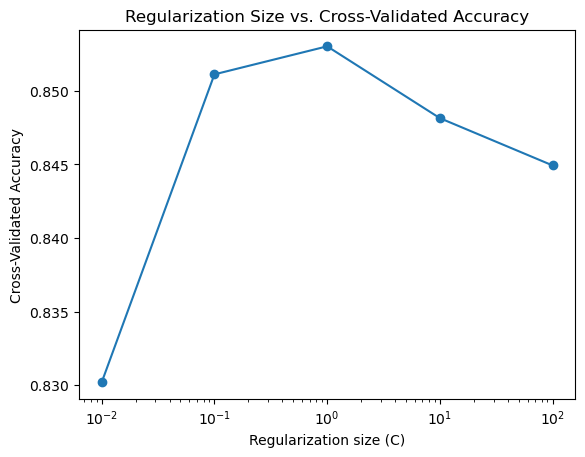

In [13]:
# Graph for Regularization Size vs. Cross-Validated Accuracy (here instead of rerunning cell above)
# Extract the mean test scores from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the regularization size (C) against the cross-validated accuracy
plt.plot(param_grid['C'], mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('Regularization size (C)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Regularization Size vs. Cross-Validated Accuracy')
plt.show()

In [14]:
# Re-train & Initialize the Logistic Regression classifier with the best C
logistic_regression_best = LogisticRegression(C=best_C, random_state=RANDOM_SEED, max_iter=100000)

# Train the classifier
logistic_regression_best.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_lr_best = logistic_regression_best.predict(X_valid)
accuracy_lr_best = logistic_regression_best.score(X_test, y_test)

In [15]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_lr_best, target_names=categories))
print(confusion_matrix(y_valid, y_pred_lr_best))
print("Logistic Regression Test Accuracy with best C:", accuracy_lr_best)

              precision    recall  f1-score   support

   ankleboot       0.94      0.95      0.95      1363
         bag       0.95      0.95      0.95      1414
        coat       0.74      0.79      0.76      1395
       dress       0.85      0.88      0.86      1441
    pullover       0.76      0.74      0.75      1424
      sandal       0.94      0.93      0.94      1406
       shirt       0.66      0.59      0.62      1403
     sneaker       0.92      0.93      0.93      1406
     trouser       0.98      0.96      0.97      1387
  tshirt-top       0.80      0.84      0.82      1361

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

[[1289    2    0    0    0   23    0   48    0    1]
 [   1 1344    6    8    9    8   21    7    0   10]
 [   0    7 1104   40  120    0  123    0    1    0]
 [   0    9   56 1264   14    0   30    0   18   50]
 [   0    9  184   16 1048   

## K Nearest Neighbor


In [16]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_knn = knn_classifier.predict(X_valid)
accuracy_knn = knn_classifier.score(X_test, y_test)

In [17]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_knn, target_names=categories))
print(confusion_matrix(y_valid, y_pred_knn))
print("KNN Test Accuracy:", accuracy_knn)

              precision    recall  f1-score   support

   ankleboot       0.88      0.97      0.92      1363
         bag       0.97      0.96      0.96      1414
        coat       0.75      0.81      0.78      1395
       dress       0.89      0.88      0.89      1441
    pullover       0.75      0.78      0.77      1424
      sandal       0.99      0.84      0.91      1406
       shirt       0.68      0.58      0.63      1403
     sneaker       0.89      0.95      0.92      1406
     trouser       0.99      0.97      0.98      1387
  tshirt-top       0.79      0.84      0.82      1361

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

[[1317    0    0    0    1    1    0   44    0    0]
 [   4 1358    5    8   13    0   15    5    0    6]
 [   0    3 1132   28  128    0   99    0    1    4]
 [   0    3   66 1271    9    0   43    0   10   39]
 [   0    4  177   21 1106   

### K Nearest Neighbor - Best K Value

In [18]:
# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for k
param_grid = {'knn__n_neighbors': range(1, 31)}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameter and the best score
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f'The best value of K is {best_k} with a cross-validated accuracy of {best_score:.4f}')

The best value of K is 7 with a cross-validated accuracy of 0.8520


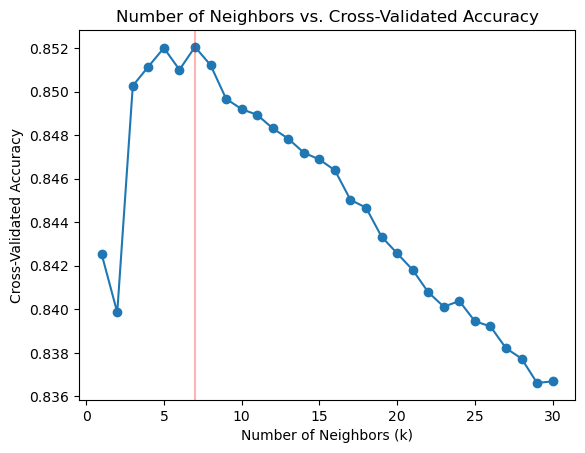

In [19]:
# Extract the mean test scores from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the number of neighbors (k) against the cross-validated accuracy
plt.plot(param_grid['knn__n_neighbors'], mean_test_scores, marker='o')
plt.axvline(best_k, 0, 1, color='r', label="best valid score at k=%d"%best_k, alpha=0.3)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Number of Neighbors vs. Cross-Validated Accuracy')
plt.show()

### K Nearest Neighbor with best K value

In [20]:
# Re-train the KNN classifier with the best k and StandardScaler
# Create a pipeline with StandardScaler and KNeighborsClassifier with the best k
pipeline_best = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

# Fit the model on the training data
pipeline_best.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_pipeline_best = pipeline_best.predict(X_valid)
accuracy_pipeline_best = pipeline_best.score(X_test, y_test)

In [21]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_pipeline_best, target_names=categories))
print(confusion_matrix(y_valid, y_pred_pipeline_best))
print("KNN Test Accuracy with best k:", accuracy_pipeline_best)

              precision    recall  f1-score   support

   ankleboot       0.88      0.97      0.92      1363
         bag       0.97      0.96      0.97      1414
        coat       0.74      0.80      0.77      1395
       dress       0.89      0.88      0.89      1441
    pullover       0.77      0.77      0.77      1424
      sandal       0.99      0.85      0.91      1406
       shirt       0.66      0.59      0.62      1403
     sneaker       0.89      0.94      0.92      1406
     trouser       0.99      0.96      0.98      1387
  tshirt-top       0.79      0.86      0.82      1361

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

[[1316    0    0    0    0    2    1   44    0    0]
 [   5 1352   10   10   10    3   16    4    0    4]
 [   0    1 1119   27  112    0  130    0    1    5]
 [   0    4   69 1270   11    0   43    0   10   34]
 [   0    2  181   19 1091   

## Random Forest

In [22]:
# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=RANDOM_SEED)

# Train the classifier
random_forest_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_rf = random_forest_classifier.predict(X_valid)
accuracy_rf = random_forest_classifier.score(X_test, y_test)

In [23]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_rf, target_names=categories))
print(confusion_matrix(y_valid, y_pred_rf))
print("Random Forest Test Accuracy:", accuracy_rf)

              precision    recall  f1-score   support

   ankleboot       0.94      0.95      0.94      1363
         bag       0.96      0.98      0.97      1414
        coat       0.76      0.84      0.80      1395
       dress       0.88      0.92      0.90      1441
    pullover       0.79      0.79      0.79      1424
      sandal       0.96      0.96      0.96      1406
       shirt       0.74      0.59      0.66      1403
     sneaker       0.94      0.93      0.93      1406
     trouser       0.99      0.96      0.98      1387
  tshirt-top       0.81      0.85      0.83      1361

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000

[[1295    2    0    0    1   19    0   46    0    0]
 [   1 1381    7    3    6    3    6    3    0    4]
 [   0    6 1178   46   99    0   61    0    2    3]
 [   0    1   44 1323    9    0   33    0    6   25]
 [   0   11  188   15 1125   

### Random Forest - Cross Validation
### This Cell takes approx 245 minutes to run. DO NOT

In [24]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=RANDOM_SEED), param_grid_rf, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f'The best parameters for Random Forest are {best_params_rf} with a cross-validated accuracy of {best_score_rf:.4f}')

The best parameters for Random Forest are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} with a cross-validated accuracy of 0.8774


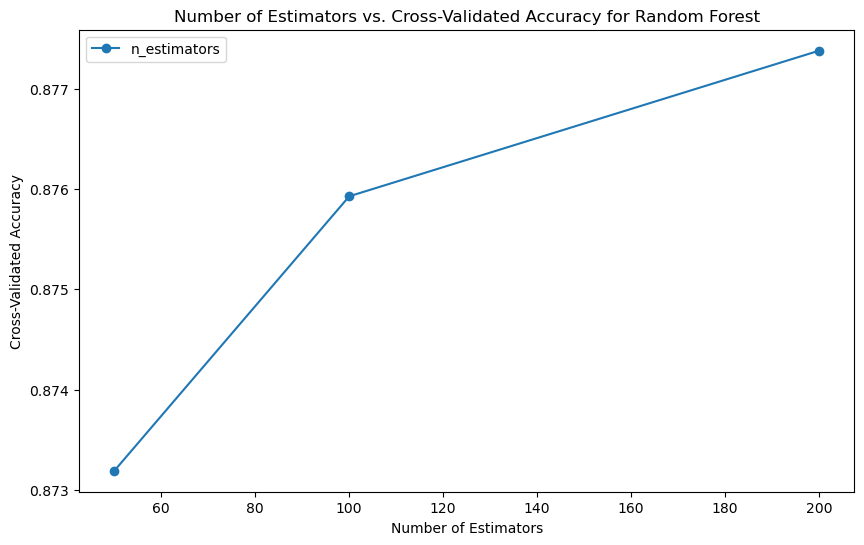

In [25]:
# Extract the mean test scores from the grid search results
mean_test_scores_rf = grid_search_rf.cv_results_['mean_test_score']

# Plot the number of estimators against the cross-validated accuracy
plt.figure(figsize=(10, 6))
plt.plot(param_grid_rf['n_estimators'], mean_test_scores_rf[:len(param_grid_rf['n_estimators'])], marker='o', label='n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Number of Estimators vs. Cross-Validated Accuracy for Random Forest')
plt.legend()
plt.show()

In [26]:
##Printing Examples
def printexamples(X, y, examples_per_class = 10, number_of_classes = 10, mult = 1.0):
    examples_per_class = 10
    pos = 0
    data = pd.DataFrame(y, columns=['yvalue'])
    for cls in range(number_of_classes):
        this_class = data[data['yvalue'] == cls]
        idxs = this_class.sample(examples_per_class).index
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow((X[idx]*mult).reshape(20,20).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
    plt.show()

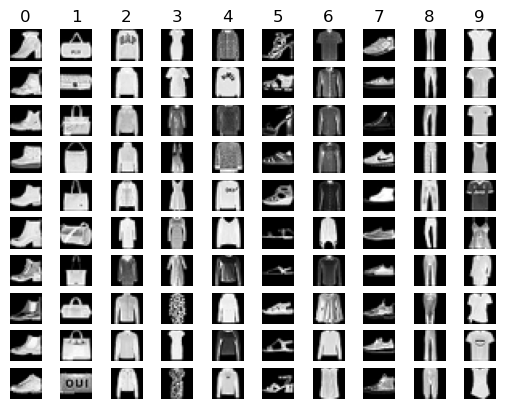

In [28]:
printexamples(X_train, y_train, 10, 10, 255.0)